## Import libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # Data processing
import matplotlib.pyplot as plt  # Plotting library
import seaborn as sns # Plotting library (better visualizations)
import plotly.graph_objs as go
import os # File navigation (to access csv)

In [2]:
# Read the csv file
df = pd.read_csv(r'C:\Users\ayu\Documents\dataset_hrd\HRDataset_v14.csv')
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [3]:
df.dtypes

Employee_Name                  object
EmpID                           int64
MarriedID                       int64
MaritalStatusID                 int64
GenderID                        int64
EmpStatusID                     int64
DeptID                          int64
PerfScoreID                     int64
FromDiversityJobFairID          int64
Salary                          int64
Termd                           int64
PositionID                      int64
Position                       object
State                          object
Zip                             int64
DOB                            object
Sex                            object
MaritalDesc                    object
CitizenDesc                    object
HispanicLatino                 object
RaceDesc                       object
DateofHire                     object
DateofTermination              object
TermReason                     object
EmploymentStatus               object
Department                     object
ManagerName 

In [18]:
pd.to_datetime(df['LastPerformanceReview_Date'])

0     2019-01-17
1     2016-02-24
2     2012-05-15
3     2019-01-03
4     2016-02-01
         ...    
306   2019-02-28
307   2015-09-02
308   2019-02-21
309   2019-02-01
310   2019-01-30
Name: LastPerformanceReview_Date, Length: 311, dtype: datetime64[ns]

In [19]:
pd.to_datetime(df['DateofTermination'])

0            NaT
1     2016-06-16
2     2012-09-24
3            NaT
4     2016-09-06
         ...    
306          NaT
307   2015-09-29
308          NaT
309          NaT
310          NaT
Name: DateofTermination, Length: 311, dtype: datetime64[ns]

In [24]:
df.isnull().sum()

Employee_Name                 0
EmpID                         0
MarriedID                     0
MaritalStatusID               0
GenderID                      0
EmpStatusID                   0
DeptID                        0
PerfScoreID                   0
FromDiversityJobFairID        0
Salary                        0
Termd                         0
PositionID                    0
Position                      0
State                         0
Zip                           0
DOB                           0
Sex                           0
MaritalDesc                   0
CitizenDesc                   0
HispanicLatino                0
RaceDesc                      0
DateofHire                    0
DateofTermination             0
TermReason                    0
EmploymentStatus              0
Department                    0
ManagerName                   0
ManagerID                     0
RecruitmentSource             0
PerformanceScore              0
EngagementSurvey              0
EmpSatis

In [23]:
#REMOVE LATER
df.dropna(inplace=True)

<AxesSubplot:xlabel='count', ylabel='RecruitmentSource'>

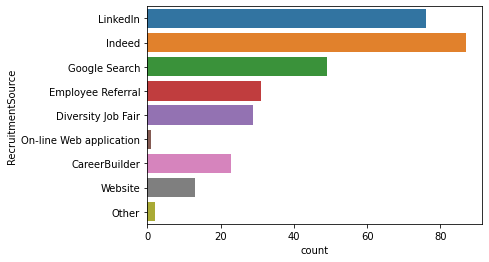

In [15]:
#Recruitment countplot
sns.countplot(y="RecruitmentSource", data=df)

## Salary

D:\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 31.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


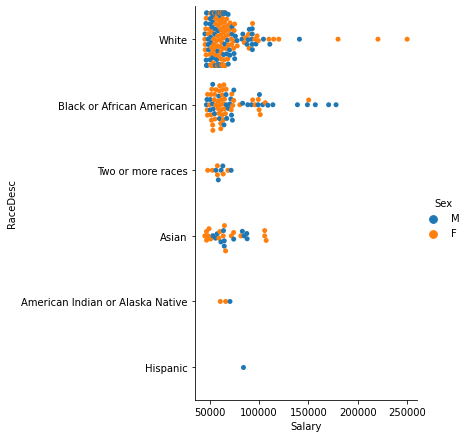

In [14]:
#Salary compared to race
sns.catplot(height=6, y="RaceDesc", x="Salary", hue="Sex",kind='swarm', data=df)

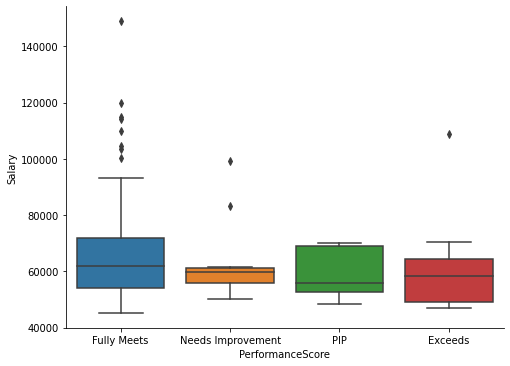

In [29]:
#Box plot performance to salary with aspect w/h
sns.catplot(aspect=7/5,x="PerformanceScore", y="Salary", kind='box',data=df)

Salary & Engagement = 0.08330492800220113


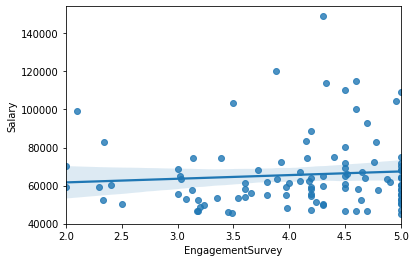

In [47]:
#Corr
sns.regplot(y="Salary", x="EngagementSurvey", data=df)
print("Salary & Engagement = "+ str(df['Salary'].corr(df['EngagementSurvey'])))

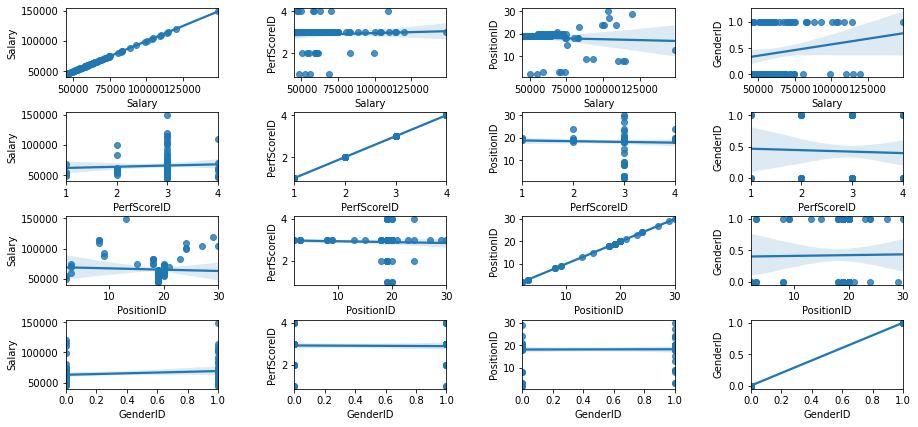

In [32]:
# We can run subplots, this example uses three columns (you can change the columns used to what you want to explore)
plt.figure(1 , figsize = (15 , 7))
n = 0 
for x in ['Salary' , 'PerfScoreID' , 'PositionID', 'GenderID']:
    for y in ['Salary' , 'PerfScoreID' , 'PositionID', 'GenderID']:
        n += 1
        plt.subplot(4 , 4 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

In [36]:
#Corr
print("Salary & Gender = "+ str(df['Salary'].corr(df['GenderID'])))
print("Salary & Performance Score = "+str(df['Salary'].corr(df['PerfScoreID'])))
print("Salary & Position = "+ str(df['Salary'].corr(df['PositionID'])))
#Extra
print("Performance Score & Position = "+ str(df['PerfScoreID'].corr(df['PositionID'])))

Salary & Gender = 0.16326753575516134
Salary & Performance Score = 0.06069442658744856
Salary & Position = -0.056802954216058237
Performance Score & Position = -0.036704270554287995


### Desc from above findings

## Termination

<AxesSubplot:xlabel='PerformanceScore', ylabel='Absences'>

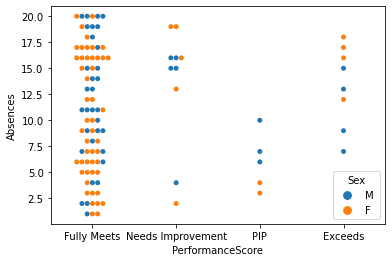

In [37]:
sns.swarmplot(data=df, x="PerformanceScore", y="Absences", hue="Sex")

<AxesSubplot:xlabel='DateofTermination', ylabel='TermReason'>

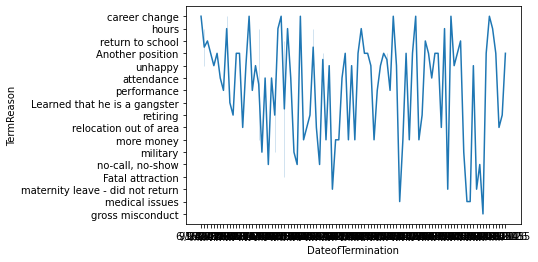

In [52]:
sns.lineplot(x='DateofTermination', y='TermReason', data=df)